Verschiedene Ansätze um die Daten zu analysieren.

In [73]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

dataset_path = "../data/raw/covid19-dataset/Covid Data.csv"
df = pd.read_csv(dataset_path)


df.DATE_DIED = df.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
df.INTUBED = df.INTUBED.apply(lambda x: x if x == 1 else 0)     
df.ICU = df.ICU.apply(lambda x: x if x == 1 else 0)

df['AT_RISK'] = df['DATE_DIED']+df['INTUBED']+df['ICU']
df.AT_RISK = df.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 

# train(90%), validation(5%) and test(5%)
train, validation = train_test_split(df, test_size=0.1, shuffle=True)
validation, test = train_test_split(validation, test_size=0.5, shuffle=True)

# df.to_csv("../data/raw/covid19-dataset/Covid Data2.csv")

train_y = train.AT_RISK.to_numpy()
train_x = train.drop(columns = ['AT_RISK']).to_numpy()

validation_y = validation.AT_RISK.to_numpy()
validation_x = validation.drop(columns = ['AT_RISK']).to_numpy()

test_y = test.AT_RISK.to_numpy()
test_x = test.drop(columns = ['AT_RISK']).to_numpy()

     

SVM

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

ks = [1,3,5,7,9]
accs = []

for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(validation_x, validation_y)
    # Scale the features using StandardScaler
    # scaler = StandardScaler()
    # test_x_std = scaler.fit_transform(validation_x)
    # X_test = scaler.transform(X_test)

    y_pred = knn_model.predict(test_x)
    acc = accuracy_score(test_y, y_pred)
    accs.append(acc)
    print(f"k: {k} - {acc}")





k: 1 - 0.954624349119762
k: 3 - 0.9545289820519178
k: 5 - 0.9537278986820271
k: 7 - 0.9522401724236587
k: 9 - 0.9505044917888955


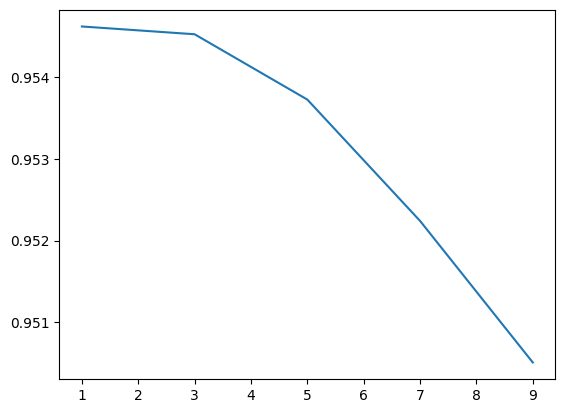

In [79]:
import matplotlib.pyplot as plt

plt.errorbar(ks, accs)
plt.show()